# TESLA 9-cell Cavity

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from astra import Astra
from pmd_beamphysics import single_particle

from distgen import Generator

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'
import os

In [3]:
# Input template file 
ASTRA_IN = '../templates/tesla_9cell_cavity/astra.in'
DISTGEN_IN =  '../templates/tesla_9cell_cavity/distgen.yaml'

In [4]:
G = Generator(DISTGEN_IN)
G.run()
P0 = G.particles

In [5]:
# Make an Astra object
A = Astra(input_file=ASTRA_IN, initial_particles=P0, verbose=True)

In [6]:
# Run
A.input['charge']['lspch'] = True
A.input['charge']['lspch3d'] = False

A.run()

Initial particles written to /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmp9yes1459/astra.particles
 --------------------------------------------------------------------------

                Astra- A space charge tracking algorithm 
               Version 3.2 - macOS 64bit - Apple Silicon   
                        DESY,  Hamburg 2011          
                        Tue Oct  4 12:55:13 

     Parameter file is:  astra.in                                          
     TESLA 9-cell cavity example                                                     

 Initialize element settings:
 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      tesla_9cell_cavity_Ez.dat                                                       
     field smoothing is applied
     Cavity Frequency               f =    1.300     GHz
     maximum gradient                      32.00     MV/m
     at                                    1.136  

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO


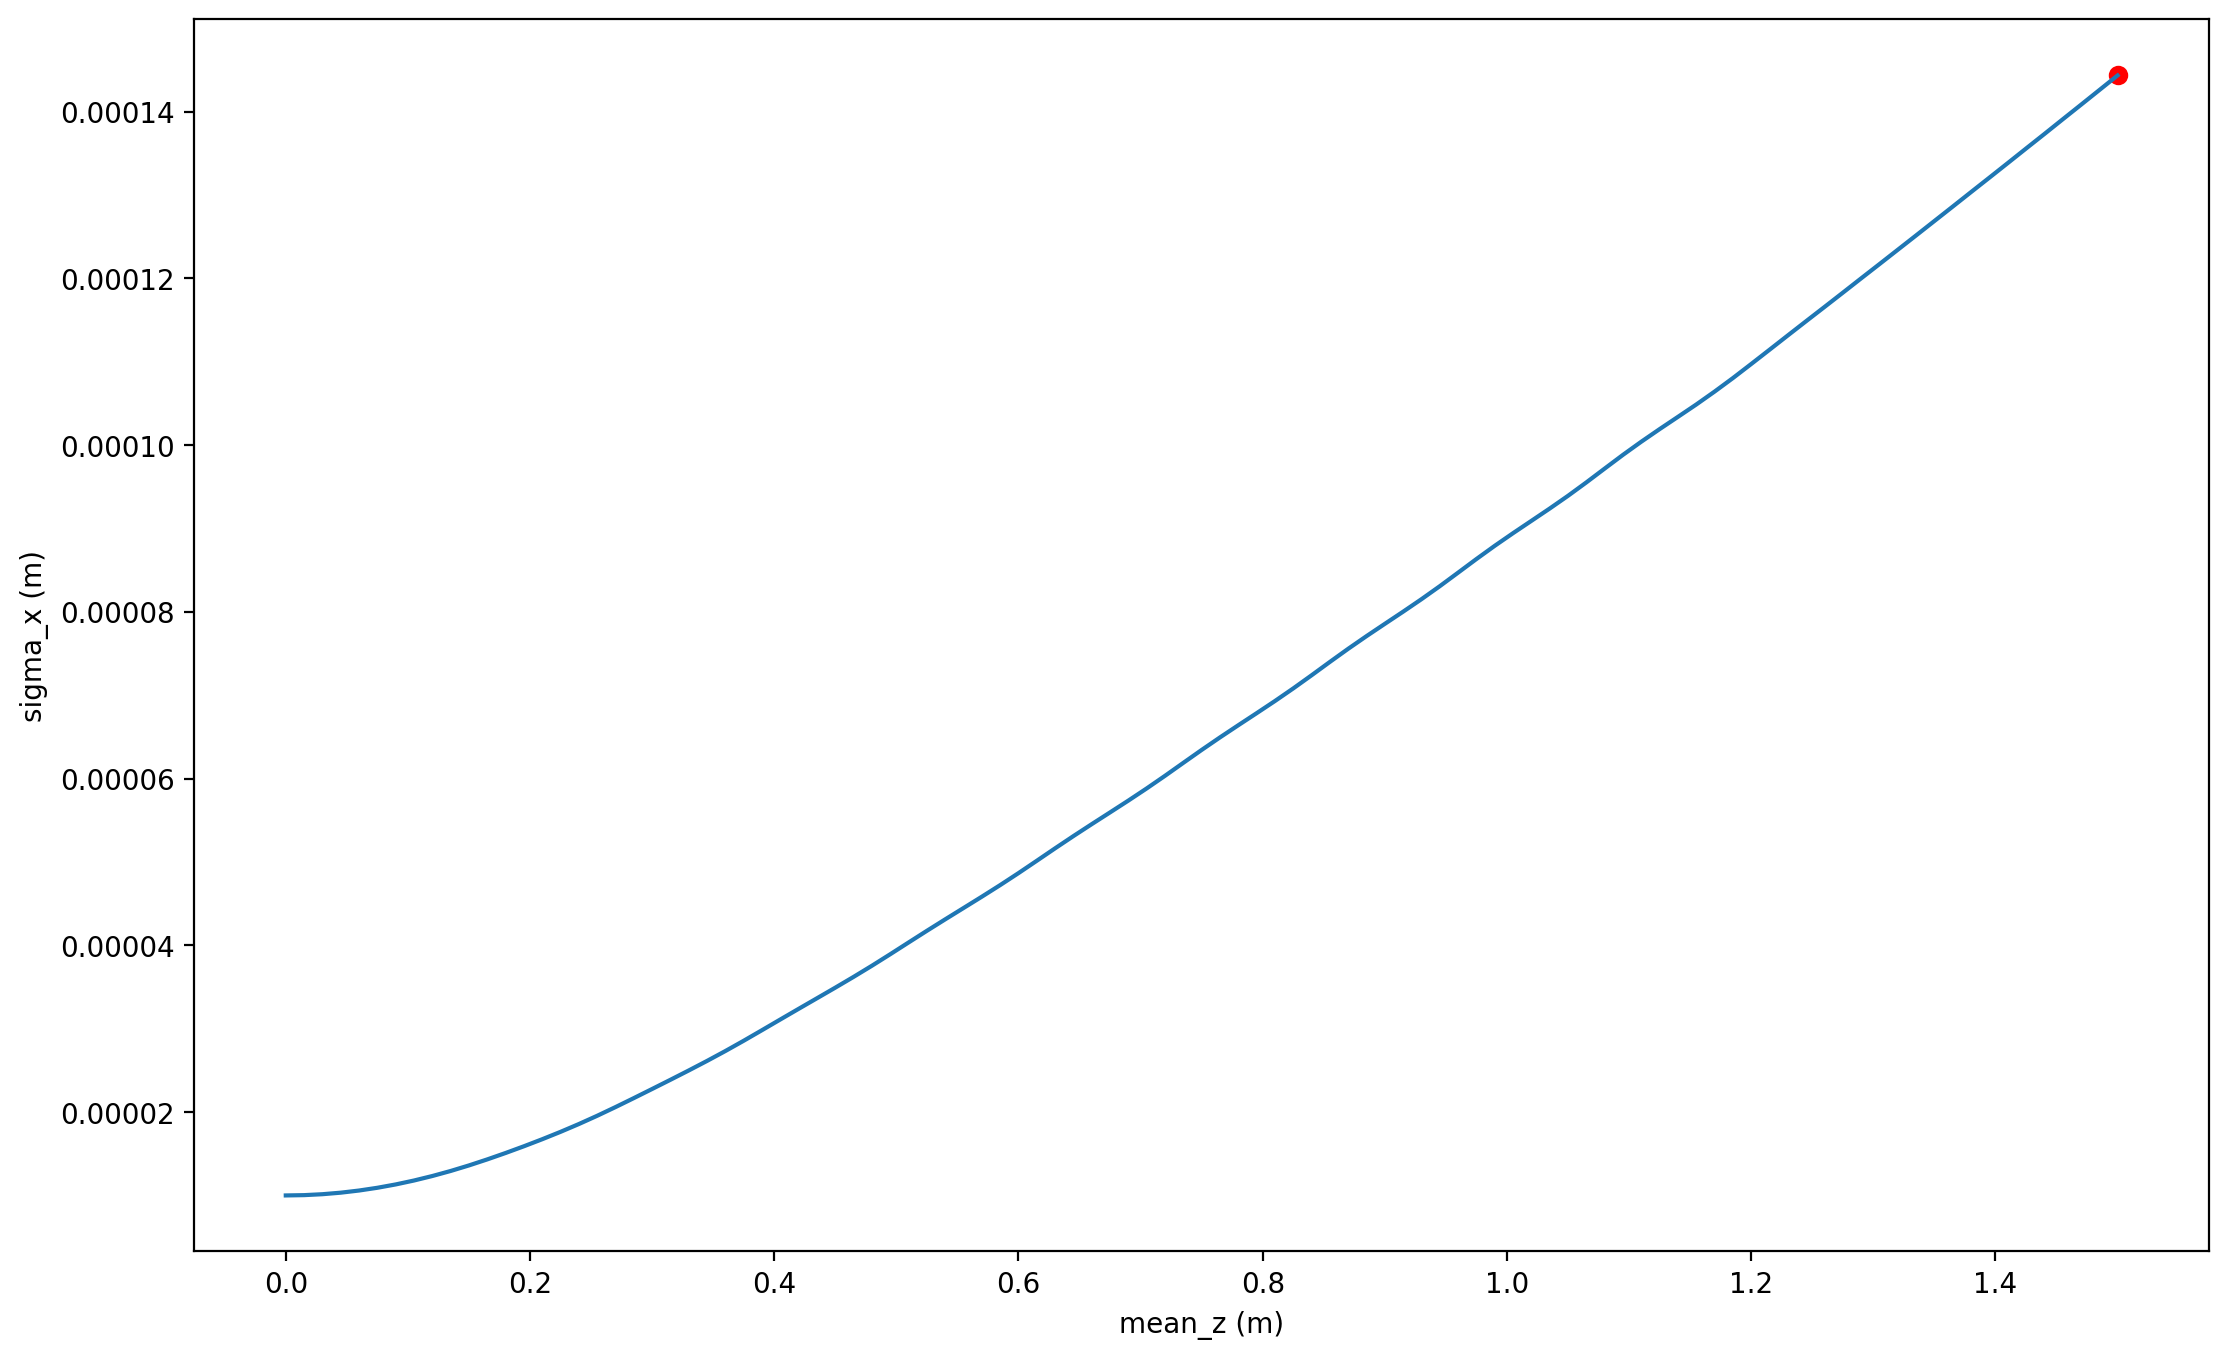

In [7]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2))
plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

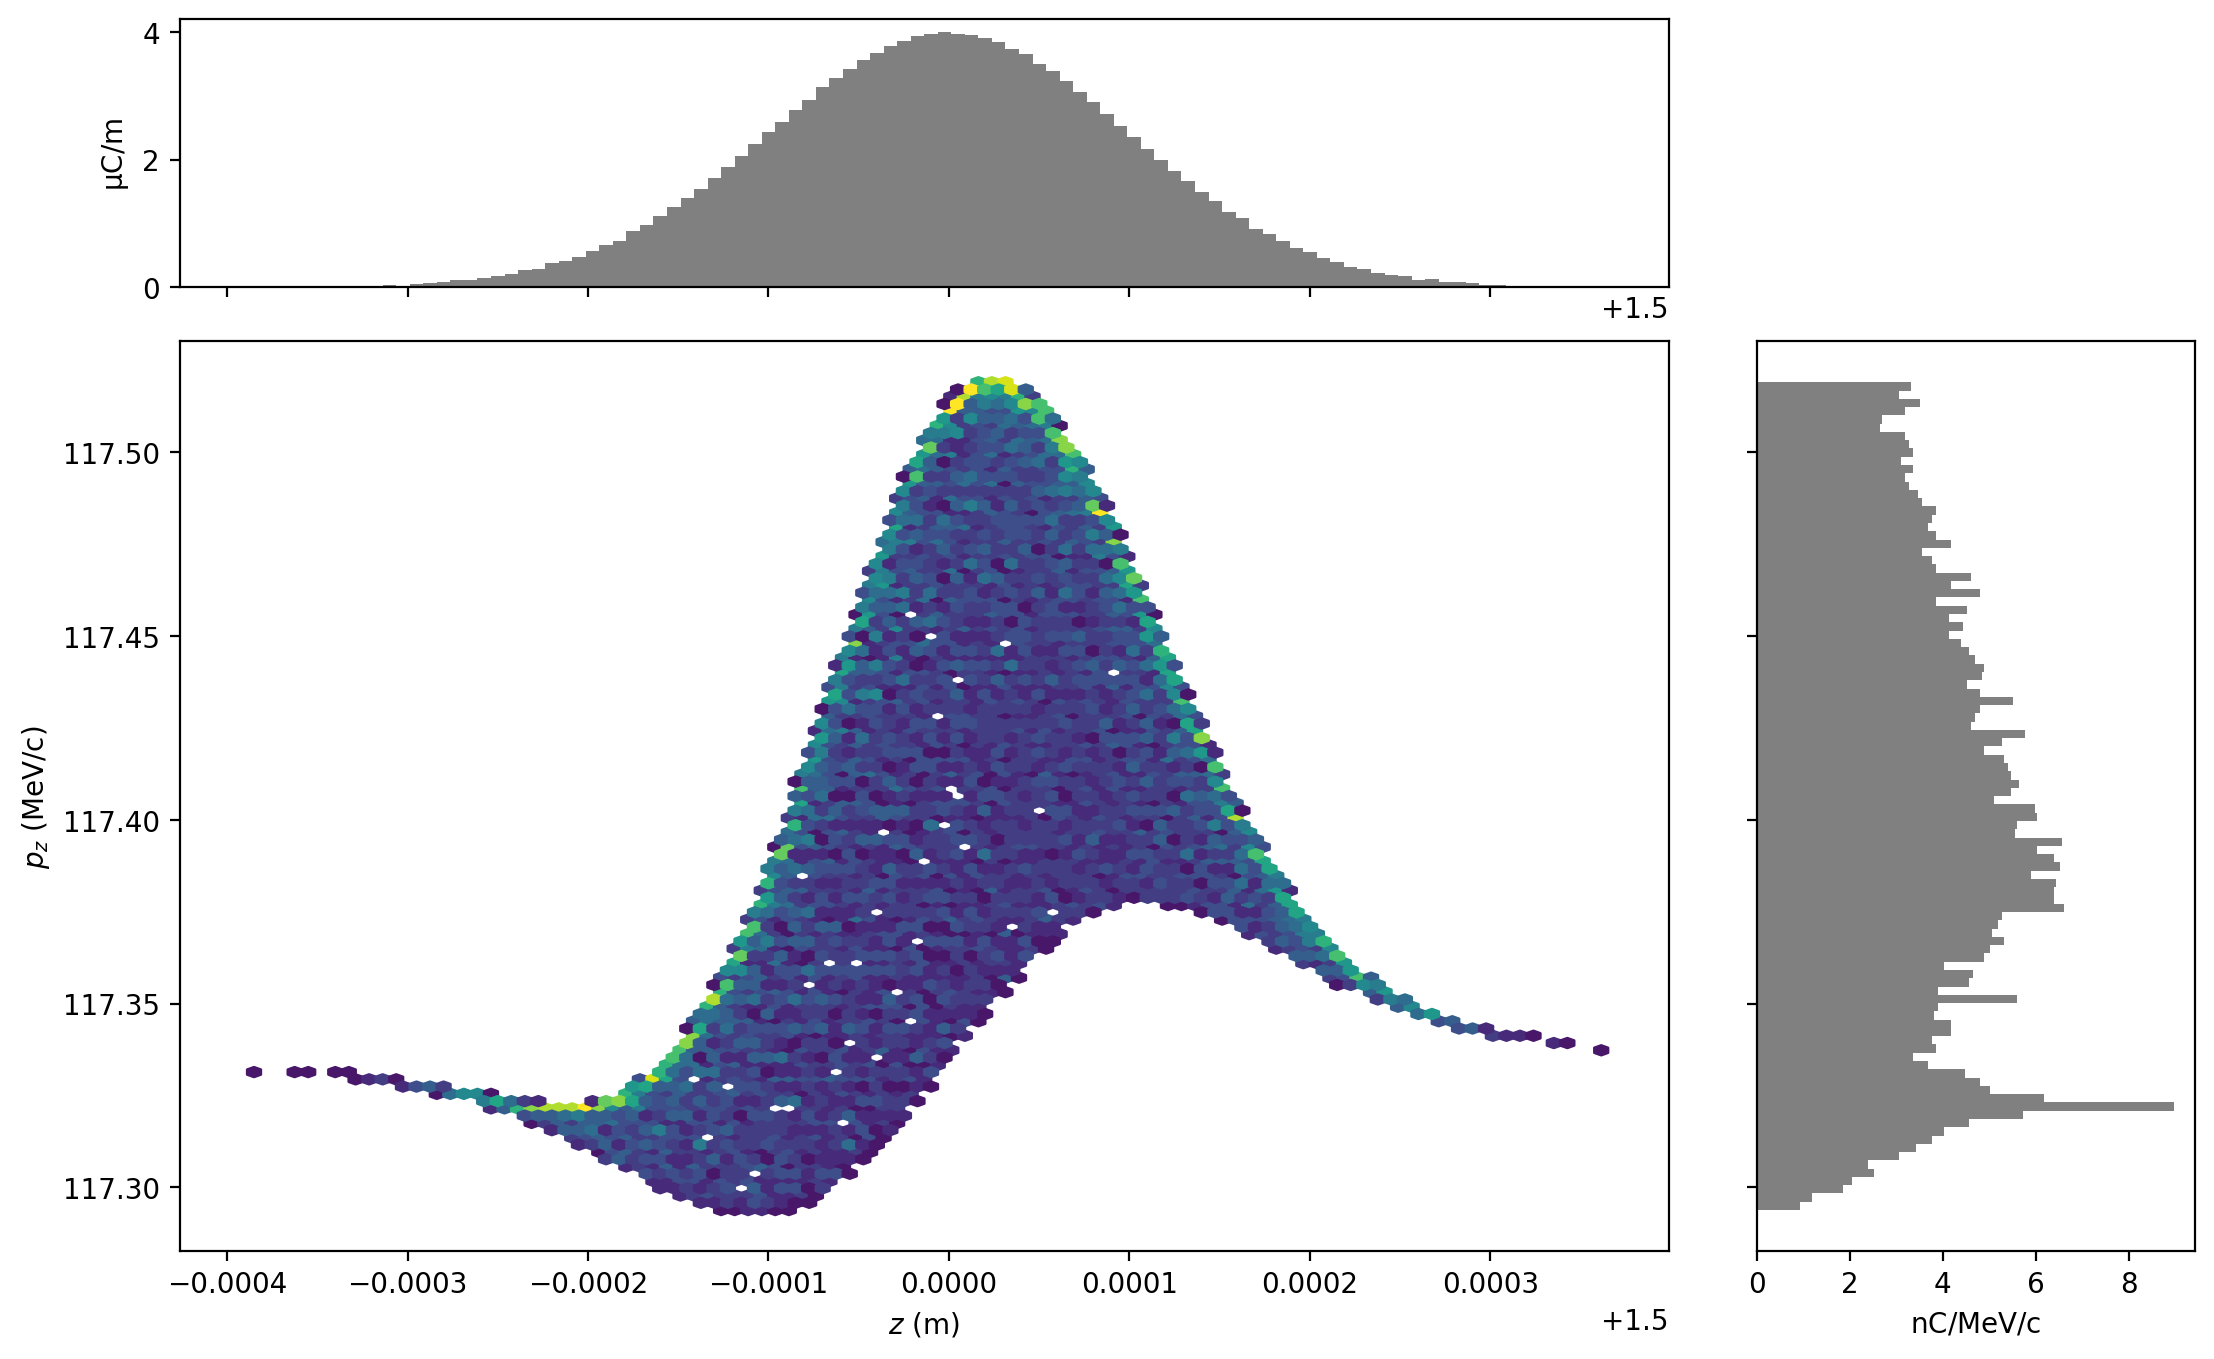

In [8]:
P = A.particles[-1]
#P.plot('x', 'px')
P.plot('z', 'pz', bins=100)

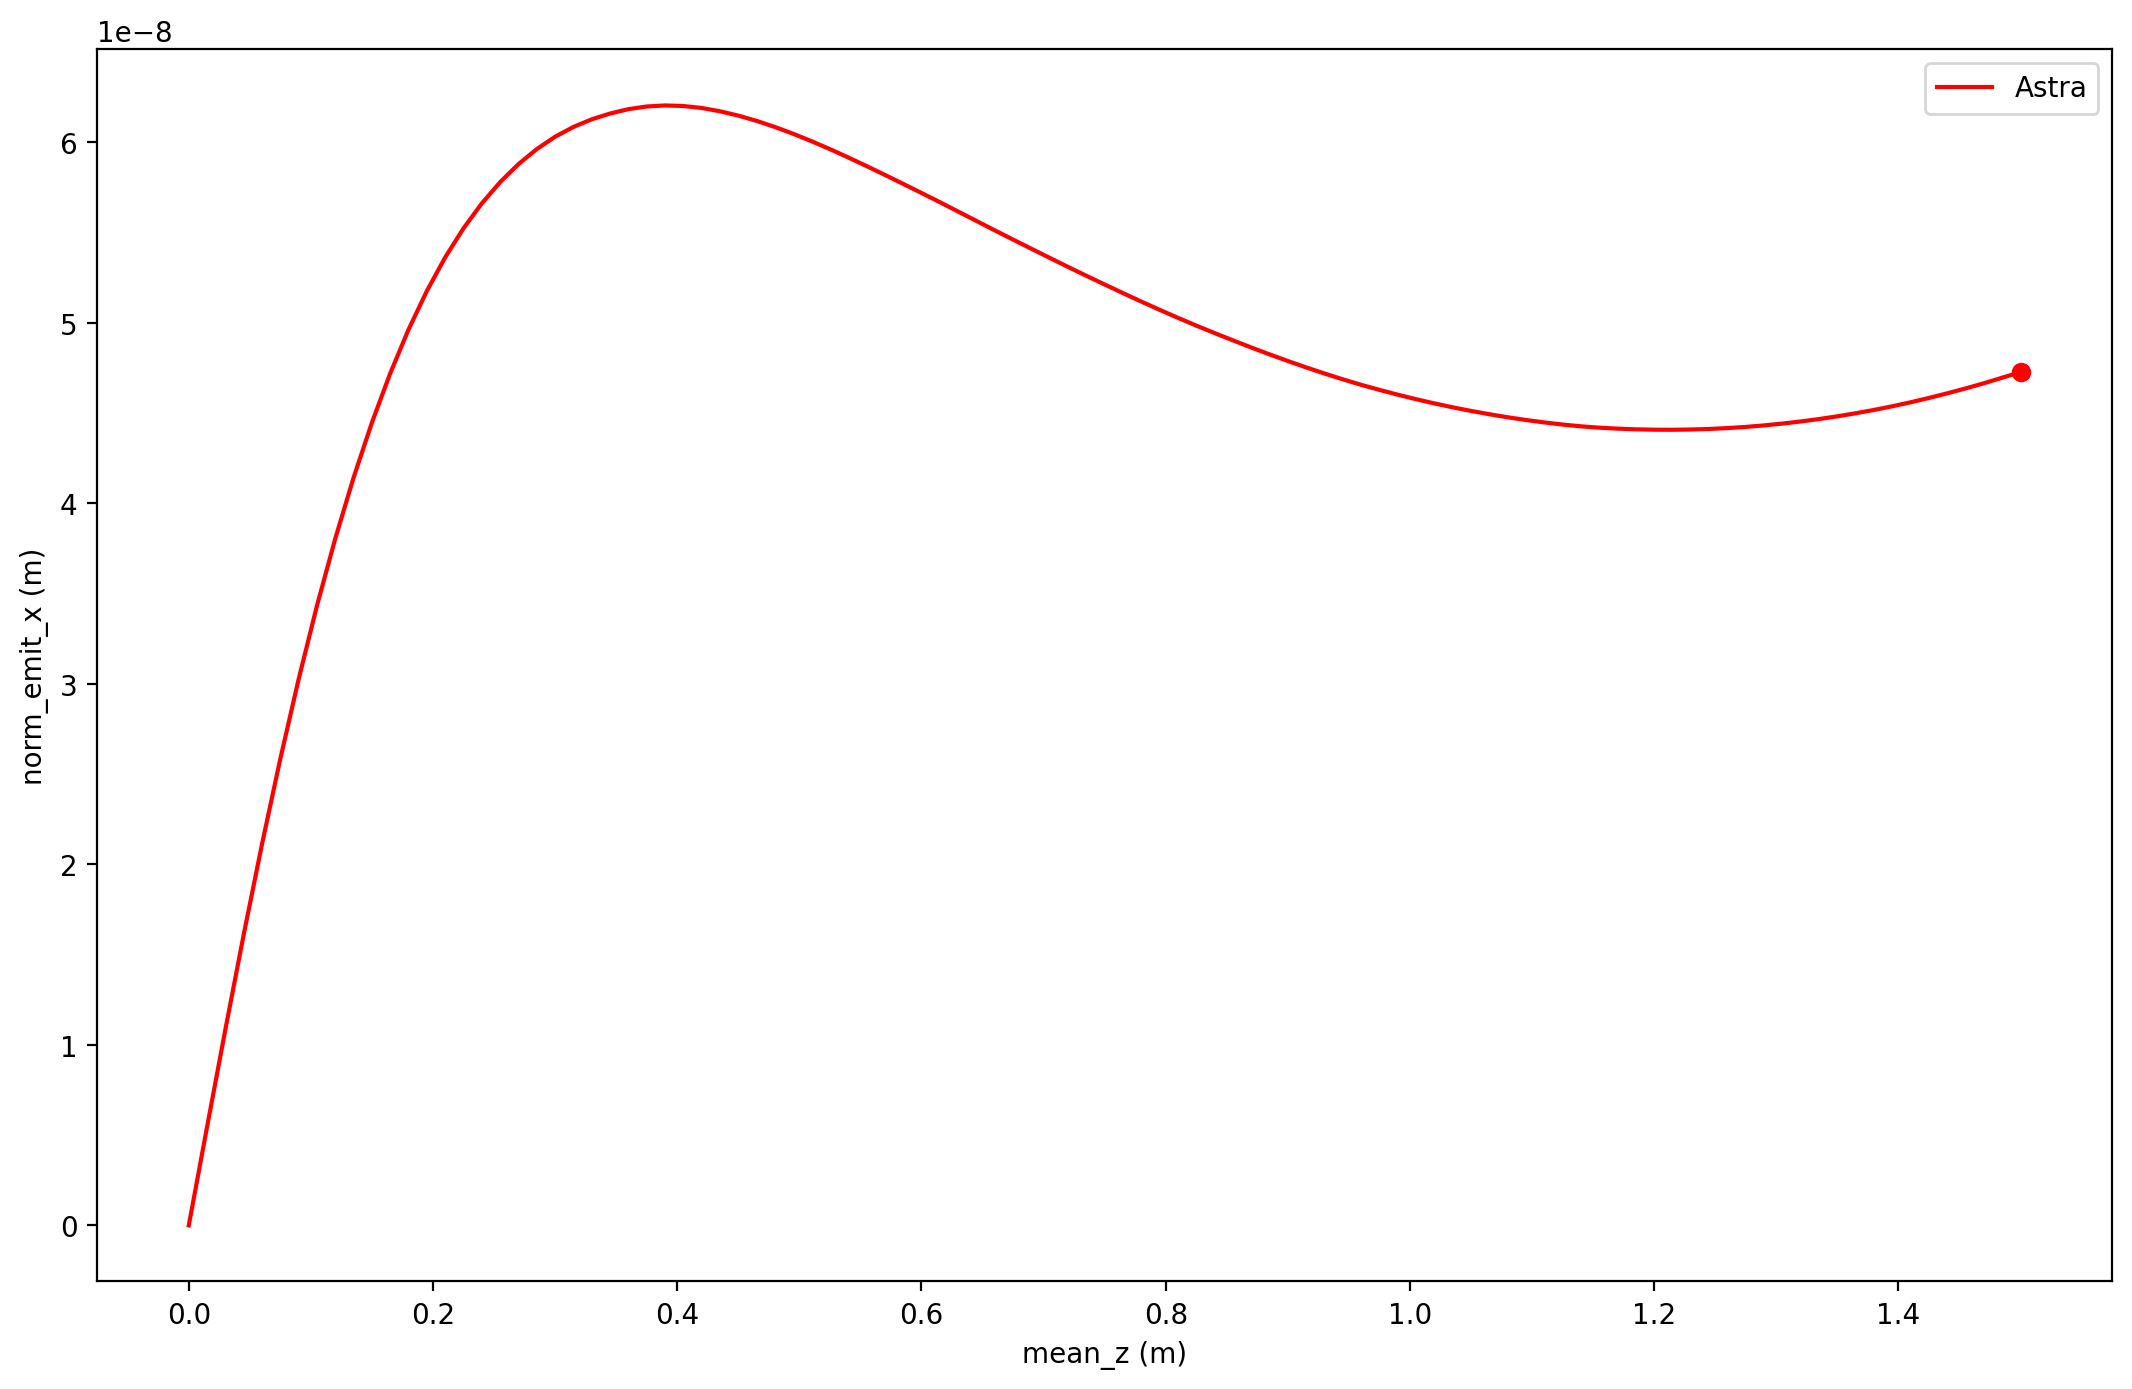

In [9]:
# Compare these. 
key1 = 'mean_z'
key2 = 'norm_emit_x'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2), label='Astra', color='red')
#plt.plot(I.stat(key1), I.stat(key2), '--', label='Impact-T', color='blue')

plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
plt.legend()
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

In [10]:
#A.archive('astra_cavity9_SC_2D.h5')

In [11]:
#PI1 = I.particles['initial_particles']
#PI2 = I.particles['final_particles']
#
#PA1 = P0
#PA2 = A.particles[-1]

In [ ]:
P0['sigma_x'], PI1['sigma_x']

In [ ]:
k1 = 'x'
k2 = 'px'
skip = 1
plt.scatter(PA1[k1][::skip], PA1[k2][::skip], label='Astra', marker='x', alpha=0.5)
plt.scatter(PI1[k1][::skip], PI1[k2][::skip], label='Impact', marker='.', alpha=0.5)
plt.legend()

In [ ]:
k1 = 'z'
k2 = 'x'
skip = 1
plt.scatter(PA2[k1][::skip], PA2[k2][::skip], label='Astra', marker='x', alpha=0.5)
plt.scatter(PI2[k1][::skip], PI2[k2][::skip], label='Impact', marker='.', alpha=0.5)
plt.legend()

In [ ]:
PA2['sigma_x'], PI2['sigma_x']

In [ ]:
plt.hist(PA2['x'], bins=50, alpha=0.5, label='Astra')
plt.hist(PI2['x'], bins=50, alpha=0.5, label='Impact')
plt.legend()

# 3D 

In [ ]:
A2 = A.copy()
A2.input['charge']['lspch'] = True
A2.input['charge']['lspch3d'] = True
A2.input['charge']['l2d_3d'] = False
A2.input['charge']['nxf'] = 32
A2.input['charge']['nyf'] = 32
A2.input['charge']['nzf'] = 64
A2.input['charge']['nx0'] = 4
A2.input['charge']['ny0'] = 4
A2.input['charge']['nz0'] = 4
A2.configure()
A2.run()

In [ ]:
P2 = A2.particles[-1]
P2.plot('x', 'px')

In [ ]:
A2.archive('astra_cavity9_SC_3D.h5')

# Compare

In [ ]:
# Compare these. 
key1 = 'mean_z'
key2 = 'norm_emit_x'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2), label='Astra 2D', color='red')
plt.plot(A2.stat(key1), A2.stat(key2), label='Astra 3D', color='blue')
plt.plot(I.stat(key1), I.stat(key2), '--', label='Impact-T', color='green')

plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
plt.legend()
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

In [ ]:
k1 = 'x'
k2 = 'px'
skip = 10
plt.title('Astra')
plt.xlabel(k1)
plt.ylabel(k2)
plt.scatter(P[k1][::skip], P[k2][::skip], label='2d', marker='x', alpha=0.5)
plt.scatter(P2[k1][::skip], P2[k2][::skip], label='3d', marker='.', alpha=0.5)

plt.scatter(PI2[k1][::skip], PI2[k2][::skip], label='Impact', marker='.', alpha=0.5)
plt.legend()

In [ ]:
k1 = 'x'
k2 = 'px'
skip = 1
plt.scatter(P[k1][::skip], P[k2][::skip], label='2d', marker='x', alpha=0.5)
plt.scatter(P2[k1][::skip], P2[k2][::skip], label='3d', marker='.', alpha=0.5)
plt.legend()

In [ ]:
P['max_pz']/ P2['max_pz']

# Compare with Impact-T

In [ ]:
from impact import Impact
I = Impact()
I.load_archive('impact_cavity9.h5')